In [45]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [46]:
df_brent = pd.read_csv("./processed_tables/brent.csv")
df_precios = pd.read_csv("./processed_tables/precios.csv")
df_precipitacion = pd.read_csv("./processed_tables/precipitacion.csv")
df_temperatura = pd.read_csv("./processed_tables/temperatura.csv")
df_trm = pd.read_csv("./processed_tables/TRM.csv")

In [47]:
df_brent = df_brent.rename(columns={"Fecha": "Date"})
df_precipitacion = df_precipitacion.rename(columns={"date": "Date"})
df_temperatura = df_temperatura.rename(columns={"date": "Date"})
df_trm = df_trm.rename(columns={"vigenciadesde": "Date"})

# Perform left joins
df_merged = pd.merge(df_precios, df_brent, on="Date", how="left")
df_merged = pd.merge(df_merged, df_precipitacion, on="Date", how="left")
df_merged = pd.merge(df_merged, df_temperatura, on="Date", how="left")
df_merged = pd.merge(df_merged, df_trm, on="Date", how="left")

In [48]:
df_merged.columns

Index(['Date', 'energy_price', 'brent_value', 'precipitacion_unidadmedida',
       'precipitacion_amazonas', 'precipitacion_antioquia',
       'precipitacion_arauca', 'precipitacion_atlantico',
       'precipitacion_bogota', 'precipitacion_bolivar', 'precipitacion_boyaca',
       'precipitacion_caldas', 'precipitacion_caqueta',
       'precipitacion_casanare', 'precipitacion_cauca', 'precipitacion_cesar',
       'precipitacion_choco', 'precipitacion_cordoba',
       'precipitacion_cundinamarca', 'precipitacion_guainia',
       'precipitacion_guaviare', 'precipitacion_huila',
       'precipitacion_la guajira', 'precipitacion_magdalena',
       'precipitacion_meta', 'precipitacion_narino',
       'precipitacion_norte de santander', 'precipitacion_putumayo',
       'precipitacion_quindio', 'precipitacion_risaralda',
       'precipitacion_san andres providencia', 'precipitacion_santander',
       'precipitacion_sucre', 'precipitacion_tolima',
       'precipitacion_valle del cauca', 'precip

In [49]:
df_merged.shape

(644, 72)

In [50]:
print(f"Fecha mínima: {df_merged.loc[0]['Date']}")

Fecha mínima: 2021-10-01


In [51]:
print(f"Fecha máxima: {df_merged.loc[df_merged.shape[0] - 1]['Date']}")

Fecha máxima: 2023-09-30


In [52]:
df_merged.describe()

,energy_price,brent_value,precipitacion_amazonas,precipitacion_antioquia,precipitacion_arauca,precipitacion_atlantico,precipitacion_bogota,precipitacion_bolivar,precipitacion_boyaca,precipitacion_caldas,...,temp_PUTUMAYO,temp_QUINDIO,temp_RISARALDA,temp_SAN ANDRES PROVIDENCIA,temp_SANTANDER,temp_SUCRE,temp_TOLIMA,temp_VALLE DEL CAUCA,temp_VICHADA,TRM
count,644.000000,644.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,616.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,644.000000
mean,322.121164,89.611661,6.270266,67.294067,9.849675,40.643075,10.772110,48.039756,106.116841,76.702240,...,22.912678,21.348549,21.506559,28.793119,19.625029,28.744456,21.675063,22.371571,27.284182,4313.503168
std,241.618420,12.144518,11.016419,73.369778,16.005523,94.156330,19.197051,77.675716,117.254883,89.132885,...,3.764467,1.840646,1.700905,1.082577,2.349299,1.673011,1.451251,1.333940,1.325667,374.097100
min,87.255265,70.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.975887,15.225000,13.450000,25.650000,13.125000,23.050000,13.950000,17.591995,20.600000,3706.950000
25%,133.920626,80.808750,0.090000,11.487600,0.000000,4.852500,0.397500,4.915000,28.390000,9.610000,...,22.081250,20.147299,20.483344,28.050000,18.078045,27.620833,20.917243,21.632185,26.750000,3972.902500
50%,239.984244,85.955000,1.837000,41.588500,2.300000,14.847000,3.535000,16.200000,64.226500,43.200000,...,24.200000,21.114753,21.503617,28.725000,18.973446,28.720833,21.736357,22.474095,27.300000,4303.340000
75%,435.658130,95.925000,8.679500,101.030750,15.000000,35.182500,12.270000,66.000000,140.482000,113.150000,...,25.275000,22.651657,22.583292,29.550000,21.769216,29.750000,22.549100,23.327473,28.118750,4636.830000
max,1061.527174,123.440000,102.080000,432.219000,152.100000,1120.190000,188.700000,701.920000,733.292000,486.500000,...,27.750000,26.200000,26.325000,31.450000,26.700000,34.150000,26.800000,25.147642,30.550000,5061.210000


In [53]:
precipitacion_columns = df_merged.filter(like='precipitacion_')
temp_columns = df_merged.filter(like='temp_')
specific_columns_df = df_merged[["brent_value", "TRM"]]
exogen_data = pd.concat([precipitacion_columns, temp_columns, specific_columns_df], axis=1)
exogen_data.drop("precipitacion_unidadmedida", axis=1, inplace=True)

In [54]:
# Borrar una vez que tengamos la data completa
exogen_data.bfill(inplace=True)

## Estandarización de la data

Para empezar a modelar la data, se debe estandarizar los datos, para ello se utilizará la librería `sklearn.preprocessing`, la cual nos permite estandarizar los datos de una manera sencilla.

In [55]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(exogen_data)
scaled_df = pd.DataFrame(scaled_data, columns=exogen_data.columns)
scaled_df

,precipitacion_amazonas,precipitacion_antioquia,precipitacion_arauca,precipitacion_atlantico,precipitacion_bogota,precipitacion_bolivar,precipitacion_boyaca,precipitacion_caldas,precipitacion_caqueta,precipitacion_casanare,...,temp_QUINDIO,temp_RISARALDA,temp_SAN ANDRES PROVIDENCIA,temp_SANTANDER,temp_SUCRE,temp_TOLIMA,temp_VALLE DEL CAUCA,temp_VICHADA,brent_value,TRM
0,-0.488814,0.940237,0.789518,0.146082,-0.541753,4.876129,-0.529791,-0.695059,-0.519111,-0.276612,...,-0.473617,-0.280608,1.054154,-0.120139,2.431165,0.302180,0.235989,-0.407030,-0.917312,-1.339552
1,-0.573001,0.843993,1.649988,-0.154230,-0.553883,5.688183,-0.323295,-0.015786,-0.426600,-0.343468,...,-0.193841,0.388629,0.866561,0.163074,-0.106327,1.147749,0.409683,1.601247,-0.917312,-1.423606
2,-0.518538,0.436556,1.586718,-0.240389,-0.551774,3.439691,0.020866,-0.626000,-0.516127,-0.196157,...,-0.529435,0.502131,0.444477,0.171723,-0.662111,1.347730,0.576624,1.601247,-0.917312,-1.423606
3,-0.560078,-0.062339,1.744893,-0.175688,-0.274350,3.795752,0.284297,-0.495806,-0.292310,0.306969,...,-0.028444,0.812674,-0.258996,0.318435,3.283702,1.221818,1.029006,0.009782,-0.761153,-1.423606
4,0.034589,1.162560,3.003963,0.527351,-0.544917,0.370752,1.561889,0.390646,0.161293,-0.179046,...,-0.931862,0.128913,0.772765,0.142526,-0.387991,0.488482,-0.044480,-0.710167,-0.614059,-1.411032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,0.861509,-0.698591,-0.596093,-0.315277,-0.555993,0.549897,-0.786424,-0.734910,0.000741,-0.325338,...,1.386350,1.860813,1.429340,1.366809,-1.122330,2.371643,0.801425,1.866491,0.279630,-0.698124
640,-0.573001,-0.891162,-0.520169,-0.206250,0.936612,-0.221239,1.257294,-0.666530,-0.060734,-0.312873,...,1.536766,2.862658,1.429340,0.680038,-0.201892,2.818840,1.307165,1.411787,0.491825,-0.654812
641,-0.471459,-0.757738,-0.140549,-0.399052,0.235140,0.003020,0.595316,-0.255570,-0.061331,0.166117,...,0.183028,0.107583,1.663831,1.168289,-0.020822,1.227515,1.193399,0.976029,0.544977,-0.588281
642,3.332671,-0.599555,-0.539150,-0.295336,-0.503251,-0.366811,-0.780476,-0.774987,-0.331702,-0.452252,...,0.839386,2.288070,0.585172,0.948308,0.145159,1.924445,1.193399,0.976029,0.491825,-0.609762


In [56]:
scaled_df.cov()

,precipitacion_amazonas,precipitacion_antioquia,precipitacion_arauca,precipitacion_atlantico,precipitacion_bogota,precipitacion_bolivar,precipitacion_boyaca,precipitacion_caldas,precipitacion_caqueta,precipitacion_casanare,...,temp_QUINDIO,temp_RISARALDA,temp_SAN ANDRES PROVIDENCIA,temp_SANTANDER,temp_SUCRE,temp_TOLIMA,temp_VALLE DEL CAUCA,temp_VICHADA,brent_value,TRM
precipitacion_amazonas,1.001555,-0.007710,-0.070657,-0.073444,0.106397,-0.032941,0.007101,0.026816,-0.018544,-0.002945,...,-0.033434,0.013345,-0.068114,-0.042191,0.049786,0.071038,0.064474,0.068248,0.015892,-0.025235
precipitacion_antioquia,-0.007710,1.001555,0.303854,0.092016,0.275863,0.331326,0.386377,0.598350,0.204488,0.103381,...,-0.342587,-0.267677,-0.099105,-0.335432,-0.220093,-0.129259,-0.339845,-0.107783,0.341552,-0.218210
precipitacion_arauca,-0.070657,0.303854,1.001555,0.022851,0.051023,0.247145,0.263805,0.114325,0.206204,0.206157,...,-0.008187,0.006973,0.149478,-0.055023,0.053088,0.098326,-0.044769,-0.171100,0.047907,-0.296438
precipitacion_atlantico,-0.073444,0.092016,0.022851,1.001555,0.022282,0.123060,0.153356,0.094042,0.024118,0.049420,...,-0.098037,-0.067079,0.066830,-0.109413,-0.141440,-0.004834,-0.049644,0.010974,0.119424,-0.017809
precipitacion_bogota,0.106397,0.275863,0.051023,0.022282,1.001555,0.082037,0.329430,0.356111,0.113359,0.113297,...,-0.145711,-0.089311,-0.098509,-0.163027,-0.032851,-0.075196,-0.173923,-0.065706,0.254862,-0.060181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
temp_TOLIMA,0.071038,-0.129259,0.098326,-0.004834,-0.075196,-0.045021,-0.032921,-0.218936,-0.099901,0.061918,...,0.600015,0.715167,0.436856,0.517417,0.527110,1.001555,0.615143,0.298924,-0.065246,-0.315832
temp_VALLE DEL CAUCA,0.064474,-0.339845,-0.044769,-0.049644,-0.173923,-0.165478,-0.164378,-0.355481,-0.077054,0.075222,...,0.692493,0.733868,0.294369,0.418850,0.475875,0.615143,1.001555,0.288896,-0.262516,-0.035713
temp_VICHADA,0.068248,-0.107783,-0.171100,0.010974,-0.065706,-0.076909,-0.094356,-0.022020,-0.146932,-0.181610,...,0.176558,0.274566,0.131204,0.213009,0.289969,0.298924,0.288896,1.001555,-0.162736,-0.119200
brent_value,0.015892,0.341552,0.047907,0.119424,0.254862,0.190907,0.051448,0.213518,0.046422,-0.006281,...,-0.371311,-0.161077,-0.247116,-0.497516,-0.269248,-0.065246,-0.262516,-0.162736,1.001555,-0.318120


In [57]:
n_components = 2
pca = PCA(n_components=n_components)  # n_components is the number of components to keep
pca_result = pca.fit_transform(scaled_data)

In [58]:
pca_df = pd.DataFrame(data=pca_result, columns=['Principal Component 1', 'Principal Component 2'])
pca_df

,Principal Component 1,Principal Component 2
0,0.527983,2.298622
1,-1.112348,3.604575
2,-1.663083,2.689703
3,-1.787148,3.581999
4,0.909645,5.046958
...,...,...
639,-6.716898,1.779117
640,-7.485725,2.390824
641,-6.520894,1.879282
642,-7.310104,0.441903


## Varianza explicada por las dos componentes principales

In [59]:
explained_variance = np.sum(pca.explained_variance_)
print(f"Varianza explicada por las {n_components} componentes: {round(explained_variance, 2)}%")

Varianza explicada por las 2 componentes: 21.48%


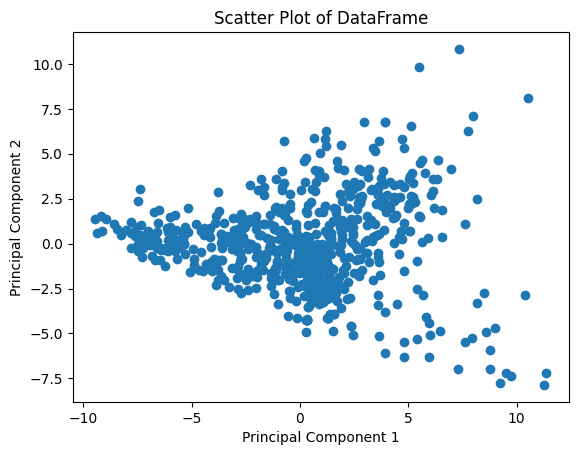

In [60]:
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of DataFrame')
plt.show()

## Regresión lineal

Usando `statsmodels` se puede realizar una regresión lineal, para ello se debe importar la librería y crear un modelo de regresión lineal, para luego ajustarlo con los datos de entrenamiento.

In [61]:
X = sm.add_constant(scaled_df)

# Create a model
model = sm.OLS(df_merged["energy_price"], X)

# Fit the model
result = model.fit()
result_summary = result.summary()

# Print out the statistics
print(result_summary)

                            OLS Regression Results                            
Dep. Variable:           energy_price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     16.26
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           2.83e-96
Time:                        11:08:41   Log-Likelihood:                -4098.3
No. Observations:                 644   AIC:                             8337.
Df Residuals:                     574   BIC:                             8649.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [62]:
result_summary_df = result_summary.tables[1]
result_summary_df

,coef,std err,t,P>|t|,[0.025,0.975]
const,322.1212,5.862,54.947,0.000,310.607,333.635
precipitacion_amazonas,8.3668,6.527,1.282,0.200,-4.452,21.186
precipitacion_antioquia,2.0874,9.701,0.215,0.830,-16.967,21.141
precipitacion_arauca,-6.8766,8.305,-0.828,0.408,-23.189,9.436
precipitacion_atlantico,-8.2028,6.832,-1.201,0.230,-21.622,5.217
precipitacion_bogota,3.6650,7.556,0.485,0.628,-11.175,18.505
precipitacion_bolivar,-9.7787,7.226,-1.353,0.177,-23.972,4.415
precipitacion_boyaca,12.1923,8.927,1.366,0.173,-5.341,29.725
precipitacion_caldas,-14.8101,10.448,-1.418,0.157,-35.331,5.711
precipitacion_caqueta,9.9091,7.359,1.347,0.179,-4.544,24.362


In [63]:
significant_variables = []
significance_level = 0.05
for i in range(1, len(result_summary_df)):
    p_value = float(result_summary_df[i][4].data)
    if p_value < significance_level:
        significant_variables.append(result_summary_df[i][0].data)
print(pd.DataFrame({"Variables significativas": significant_variables}))

                             Variables significativas
0                                               const
1                                 precipitacion_cauca
2                                       temp_AMAZONAS
3                                      temp_ANTIOQUIA
4   temp_ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y ...
5                                      temp_ATLANTICO
6                                         temp_CALDAS
7                                        temp_CAQUETA
8                                          temp_CHOCO
9                                   temp_CUNDINAMARCA
10                                       temp_GUAINIA
11                                         temp_HUILA
12                                          temp_META
13                                        temp_NARIÑO
14                                     temp_SANTANDER
15                               temp_VALLE DEL CAUCA
16                                        brent_value
